In [44]:
import pandas as pd
df = pd.DataFrame({'x': [1,2,3,4,5,6,7,8],
                   'y': [1.3,1.8,3.5,4,4.6,6.8,7.1,7.8]})
df

,x,y
0,1,1.3
1,2,1.8
2,3,3.5
3,4,4.0
4,5,4.6
5,6,6.8
6,7,7.1
7,8,7.8


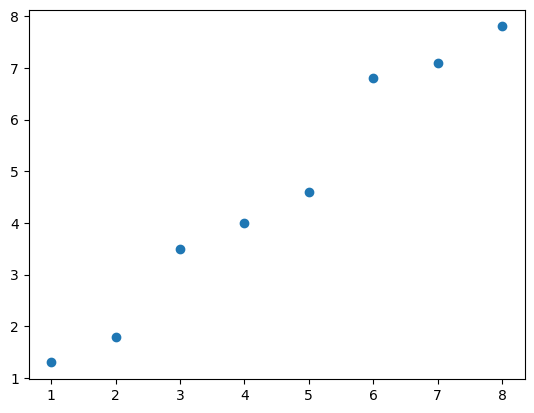

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(df['x'], df['y'])
plt.show()

In [46]:
#vamos supor uma reta y = x, que "passe" pelos pontos
df['y_reta'] = df['x']

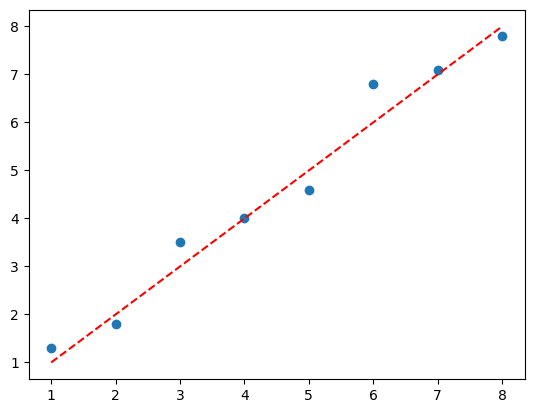

In [47]:
fig, ax = plt.subplots()

ax.scatter(df['x'], df['y'])
ax.plot(df['x'], df['y_reta'], '--r')
plt.show()

Se esta fosse a reta do modelo $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$, existem erros (resíduos) pois existem fatores não presentes no modelo que influenciam o fenômeno em análise. A equação na verdade é escrita como $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x + u$, sendo $u$ o erro que se comete ao estimar $y_i$ por meio da variável $x_i$ . Esse termo capta todos os fatores, além de X, responsáveis pela estimativa de $y$.

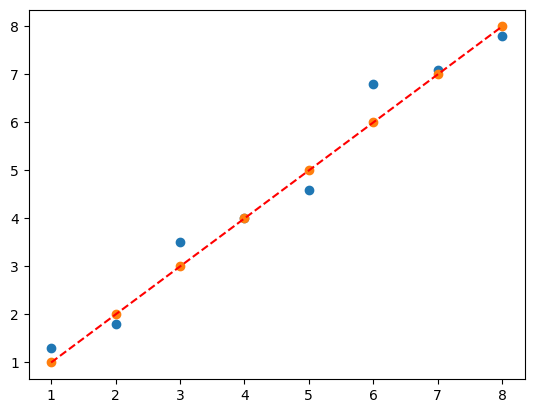

In [48]:
fig, ax = plt.subplots()

ax.scatter(df['x'], df['y'])
ax.plot(df['x'], df['y_reta'], '--r')
ax.scatter(df['x'], df['y_reta'])
plt.show()

Essa é a melhor previsão que podemos fazer para os dados? A resposta é NÃO. A melhor reta que "passa" por estes pontos é a que permite MINIMIZAR o erro quadrático entre cada ponto $y$ observado e cada ponto $y$ estimado = $\hat{y}$. Isto é feito pelo método dos mínimos quadrados, objeto de estudo em estatística. Vamos usar a regressão linear do scikit learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [49]:
from sklearn.linear_model import LinearRegression

#fit (treino do modelo, ou seja, obter os parâmetros do modelo que ajustam x à y)
#reg = LinearRegression().fit(df['x'], df['y']) #execute esta linha e dará ERRO, pois só há uma feature em X. 
                                               #o algoritmo exige que o array seja 2D. Este arranjo é corrigido com reshape

In [50]:
#o reshape deve ser feito apenas nos valores de x. Se tentar fazer no df['x'], como é uma Series, não é possível, logo
df['x'].values.reshape(-1,1)

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]], dtype=int64)

In [51]:
#criando o regressor, ou seja, o modelo de regressão linear simples
modelo = LinearRegression().fit(df['x'].values.reshape(-1,1), df['y'])

In [52]:
modelo.intercept_

0.19285714285714217

In [53]:
#verificar coeficiente angular (intercepto - beta_1)
reg.coef_

array([0.88])

Em termos de produção, o modelo é $\hat{y} = 0.399 + 0.880x$. Dado um $x$, calcule e exiba a estimativa da variável target $y$.

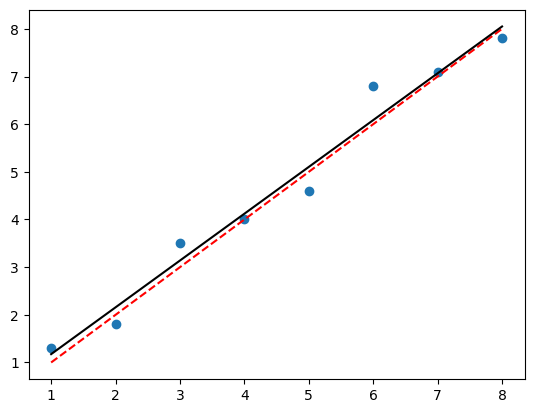

In [54]:
beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]

y_hat = beta_0 + beta_1*df['x'].values #y predito

fig, ax = plt.subplots()

ax.scatter(df['x'], df['y'])
ax.plot(df['x'], df['y_reta'], '--r')
#ax.scatter(df['x'], df['y_reta'])
ax.plot(df['x'], y_hat, 'k')
plt.show()

In [55]:
#aplicando o modelo ao conjunto de dados x
df['y_pred'] = modelo.predict(df['x'].values.reshape(-1,1))

In [56]:
df

,x,y,y_reta,y_pred
0,1,1.3,1,1.175000
1,2,1.8,2,2.157143
2,3,3.5,3,3.139286
3,4,4.0,4,4.121429
4,5,4.6,5,5.103571
5,6,6.8,6,6.085714
6,7,7.1,7,7.067857
7,8,7.8,8,8.050000


In [57]:
#vamos comparar a soma dos erros quadráticos entre a reta inicial y_reta e a reta obtida por mínimos quadrados y_pred
modelo_1 = sum((df['y']-df['y_reta'])**2)
modelo_2 = sum((df['y']-df['y_pred'])**2)

print(f' modelo 1: {modelo_1}')
print(f' modelo 2: {modelo_2}')



 modelo 1: 1.23
 modelo 2: 1.1153571428571438


In [58]:
df['modelo_1_erro'] = (df['y']-df['y_reta'])**2
df['modelo_2_erro'] = (df['y']-df['y_pred'])**2
df


,x,y,y_reta,y_pred,modelo_1_erro,modelo_2_erro
0,1,1.3,1,1.175000,0.09,0.015625
1,2,1.8,2,2.157143,0.04,0.127551
2,3,3.5,3,3.139286,0.25,0.130115
3,4,4.0,4,4.121429,0.00,0.014745
4,5,4.6,5,5.103571,0.16,0.253584
5,6,6.8,6,6.085714,0.64,0.510204
6,7,7.1,7,7.067857,0.01,0.001033
7,8,7.8,8,8.050000,0.04,0.062500


In [59]:
df[['modelo_1_erro', 'modelo_2_erro']].sum()

modelo_1_erro    1.230000
modelo_2_erro    1.115357
dtype: float64

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print(mean_absolute_error(df['y'], df['y_reta']))
print(mean_squared_error(df['y'], df['y_reta']))
print('------------------------------')
print(mean_absolute_error(df['y'], df['y_pred']))
print(mean_squared_error(df['y'], df['y_pred']))

print(round(r2_score(df['y'], df['y_pred']),3))

0.3125
0.15375
------------------------------
0.3080357142857145
0.13941964285714298
0.973


In [61]:
residual = df['y'] - df['y_pred']
residual

0    0.125000
1   -0.357143
2    0.360714
3   -0.121429
4   -0.503571
5    0.714286
6    0.032143
7   -0.250000
dtype: float64

In [62]:
"""
Em regressão linear, por exemplo, os resíduos devem ser independentes uns dos outros, 
identicamente distribuídos, possuir uma distribuição normal e homocedásticos.
"""

#media e desvio padrão do desvio
print(residual.mean())
print(residual.std())

1.6653345369377348e-16
0.39917005736136785


In [68]:
from scipy.stats import normaltest, skew, kurtosis

In [ ]:
"""p-value da aderência dos resíduos à normalidade. A hipótese nula H0 é que são aderentes. Se o p-value der < 0.05 é por que H0 é rejeitada,
   logo não seria aderente. O nível de significância é geralmente determinado pelo pesquisador antes da coleta dos dados
   e é tradicionalmente fixado em 0.05 (5%) ou menos, dependendo da área de estudo. Em muitas áreas de estudo, 
   resultados com nível de significância de 0.05 (probabilidade de erro de 5%) são considerados estatisticamente relevantes.
   Em outras palavras, o p-valor é o menor nível de significância para o qual se rejeita a hipótese nula. 
   Por exemplo, a hipótese nula é rejeitada a 5% quando o p-valor é menor que 5%
"""

In [66]:
print(normaltest(residual)[1])

0.6593816798207801


In [69]:
print(skew(residual))

0.5347058415755822


In [71]:
print(kurtosis(residual, fisher=False)) #a da normal é 3

2.329098780211236


In [75]:
import statsmodels.api as sm

In [76]:
y = df['y']
x = df['x']
x = sm.add_constant(x)

modelo_3 = sm.OLS(y, x).fit()
modelo_3.summary()

C:\Users\josen\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 25 Oct 2023   Prob (F-statistic):           6.07e-06
Time:                        22:03:44   Log-Likelihood:                -3.4704
No. Observations:                   8   AIC:                             10.94
Df Residuals:                       6   BIC:                             11.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1929      0.336      0.574      0.587      -0.629       1.015
x              0.9821      0.067     14.763      0.000       0.819       1.145
==============================================================================
Omnibus:                        0.833   Durbin-Watson:                   2.828
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.531
Skew:                           0.535   Prob(JB):                        0.767
Kurtosis:                       2.329   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""